In [1]:
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


# Load the model
model = load_model('/home/user/Notebooks/PLots/keras/my_model.h5')


model.load_weights('/home/user/Notebooks/PLots/keras/my_weights.h5')


model.summary()

2024-03-14 06:43:34.883189: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-14 06:43:34.906756: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-14 06:43:34.906780: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-14 06:43:34.906801: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-14 06:43:34.911333: I tensorflow/core/platform/cpu_feature_g

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8970, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 2242, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 2242, 32)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2227, 64)          32832     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 556, 64)           0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 556, 64)           0

In [2]:
labels = {
    0:"Blast",
    1:"EQ",
    2:"Noise"
}

In [3]:
import numpy as np

x_test = np.load('/home/user/Notebooks/test_notes/data/GJI_test_3_X.npy')

y_test = np.load('/home/user/Notebooks/test_notes/data/GJI_test_3_Y.npy')

#x_test, y_test = shuffle(x_test, y_test, random_state=3)

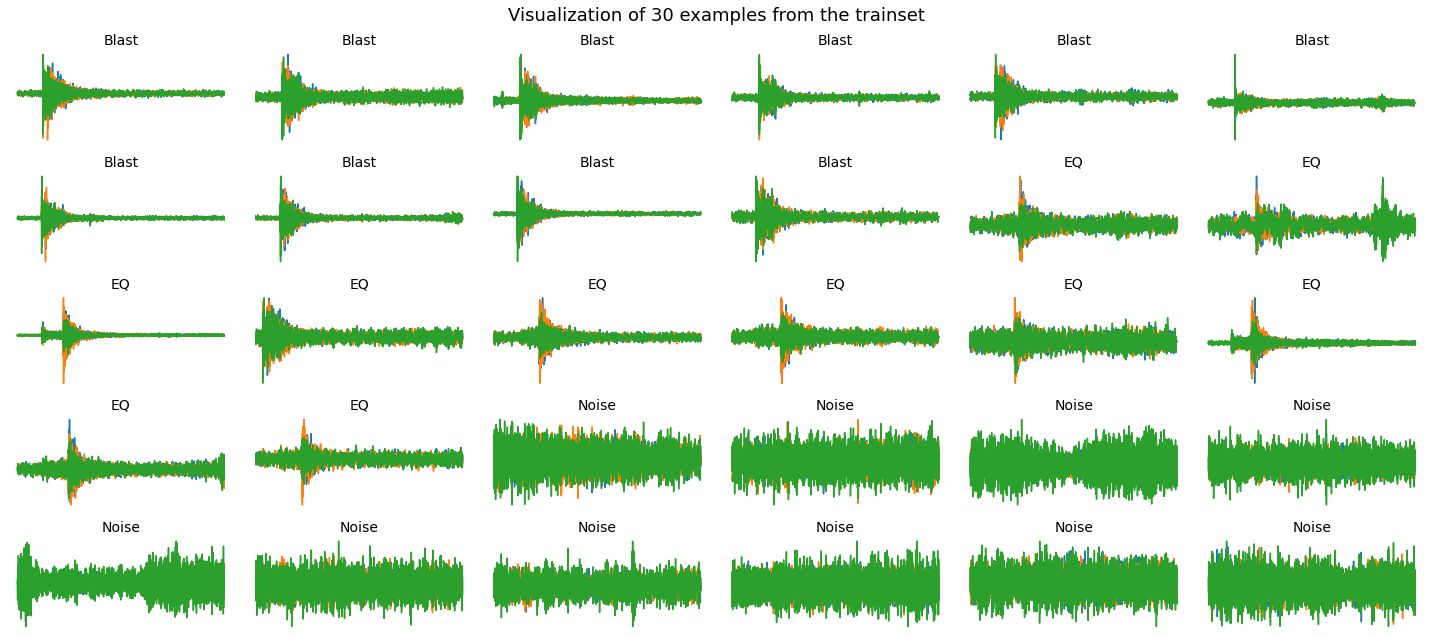

In [4]:
# plotting the  30 waveforms from the training set
plt.figure(figsize=(20,9), tight_layout=True)
for i  in range(30):
    plt.subplot(5, 6, i+1)
    plt.plot(x_test[i])
    plt.title(labels[y_test[i]], fontsize=14)
    plt.suptitle("Visualization of 30 examples from the trainset", fontsize=18)
    plt.axis('off')
plt.show()

In [5]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [6]:
y_test = to_categorical(y_test, 3)

In [7]:
IP = (x_test.shape[1], x_test.shape[2],)

pred = (model.predict(x_test))
print(pred)

2024-03-14 06:43:38.242021: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8905


1/1 [==============================] - 1s 517ms/step
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [17]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(f"\nPerformance on Testset: accuracy = {accuracy*100:.2f}%")


Performance on Testset: accuracy = 96.67%


In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))


print (classification_report(y_test_arg, Y_pred))

print("accuracy: ", accuracy_score(y_test_arg, Y_pred))



1/1 [==============================] - 0s 13ms/step
Confusion Matrix
[[10  0  0]
 [ 1  9  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

accuracy:  0.9666666666666667
